In [195]:
import pandas as pd

df = pd.read_csv("historical-weather.csv")
df

rowID     hpwren_timestamp  air_pressure  air_temp  \
0            0  2011-09-10 00:00:49         912.3     64.76   
1          100  2011-09-10 01:40:49         911.8     62.96   
2          200  2011-09-10 03:20:49         911.4     68.00   
3          300  2011-09-10 05:00:49         911.4     64.22   
4          400  2011-09-10 06:40:49         912.2     52.70   
...        ...                  ...           ...       ...   
15868  1586800  2014-09-10 16:23:29         914.3     77.18   
15869  1586900  2014-09-10 18:03:29         914.4     77.00   
15870  1587000  2014-09-10 19:43:29         914.9     75.92   
15871  1587100  2014-09-10 21:23:29         915.7     75.38   
15872  1587200  2014-09-10 23:03:29         915.9     75.74   

       avg_wind_direction  avg_wind_speed  max_wind_direction  max_wind_speed  \
0                    97.0             1.2               106.0             1.6   
1                    95.0             2.3               106.0             2.5   
2                    53.0             0.3                69.0             0.5   
3                   191.0             2.8               197.0             2.9   
4                   181.0             1.5               191.0             2.0   
...                   ...             ...                 ...             ...   
15868               225.0             5.2               238.0             6.0   
15869               190.0             1.5               196.0             1.7   
15870               344.0             0.4               352.0             0.6   
15871                13.0             1.5                24.0             1.7   
15872               335.0             0.9               348.0             1.1   

       min_wind_direction  min_wind_speed  rain_accumulation  rain_duration  \
0                    85.0             1.0                NaN            NaN   
1                    88.0             1.9                0.0            0.0   
2                    19.0             0.2                0.0            0.0   
3                   185.0             2.6                0.0            0.0   
4                   164.0             1.2                0.0            0.0   
...                   ...             ...                ...            ...   
15868               214.0             4.4                0.0            0.0   
15869               185.0             1.4                0.0            0.0   
15870               336.0             0.3                0.0            0.0   
15871                 4.0             1.2                0.0            0.0   
15872               322.0             0.7                0.0            0.0   

       relative_humidity  
0                   60.5  
1                   63.9  
2                   33.4  
3                   58.2  
4                   89.8  
...                  ...  
15868               43.2  
15869               42.8  
15870               43.9  
15871               46.7  
15872               47.8  

[15873 rows x 13 columns]

In [196]:
# Verify that the dataset is clean by checking for null values:
df.isnull().values.any()

True

There are null values. I'll get rid of them in the next cell:

In [197]:
df.dropna(inplace=True)
df.isnull().values.any()

False

There are no more null values; I have at least partially a clean dataset

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15869 entries, 1 to 15872
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rowID               15869 non-null  int64  
 1   hpwren_timestamp    15869 non-null  object 
 2   air_pressure        15869 non-null  float64
 3   air_temp            15869 non-null  float64
 4   avg_wind_direction  15869 non-null  float64
 5   avg_wind_speed      15869 non-null  float64
 6   max_wind_direction  15869 non-null  float64
 7   max_wind_speed      15869 non-null  float64
 8   min_wind_direction  15869 non-null  float64
 9   min_wind_speed      15869 non-null  float64
 10  rain_accumulation   15869 non-null  float64
 11  rain_duration       15869 non-null  float64
 12  relative_humidity   15869 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.7+ MB


In [199]:

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler() #creates an instance of that scaler

#if air pressure input is x, use it on this point on the bell curve
scaled_df = scalar.fit_transform(df.iloc[:,2:])
scaled_df
#if positive, air pressure is above avg
#if neg., then air pressure is below than agv.

array([[-1.64831458,  0.09318246, -0.69552331, ..., -0.04252408,
        -0.08687775,  0.62275884],
       [-1.77939979,  0.51904389, -1.1361823 , ..., -0.04252408,
        -0.08687775, -0.54183095],
       [-1.77939979,  0.19964782,  0.31169726, ..., -0.04252408,
        -0.08687775,  0.40511419],
       ...,
       [-0.63240417,  1.18825469,  1.91695503, ..., -0.04252408,
        -0.08687775, -0.1409066 ],
       [-0.37023374,  1.14262668, -1.55585754, ..., -0.04252408,
        -0.08687775, -0.03399343],
       [-0.30469114,  1.17304535,  1.82252811, ..., -0.04252408,
        -0.08687775,  0.00800816]])

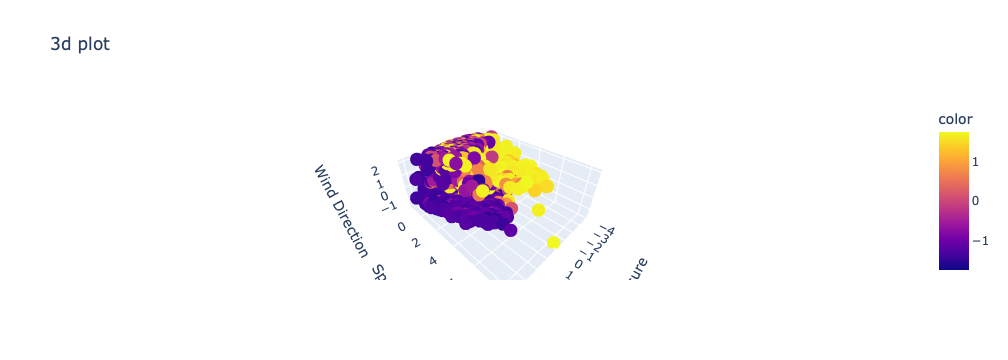

In [200]:
#3d scatterplot, used same source as before in the other file

import plotly.express as px

fig = px.scatter_3d(scaled_df, x = scaled_df[:,0], z = scaled_df[:,2], y = scaled_df[:,3], color = scaled_df[:,10], labels=dict(x="Air Pressure", y="Speed", z="Wind Direction"), title = "3d plot")
fig.show()

# running kmeans #

In [214]:
#sklearn's implementation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(scaled_df) #I see 3 main clusters in the plot

#my own implementation:
from KMeans_implementation import KMeans_implementation
KMeans_implementation = KMeans_implementation(n_clusters=3) #again, there are 3 main clusters
KMeans_implementation_centroids = KMeans_implementation.fit(scaled_df)

kmeans.cluster_centers_

array([[-0.06525242,  0.11807622,  0.69383781, -0.40682272,  0.56240717,
        -0.39444577,  0.45695232, -0.41326206, -0.03870246, -0.06260074,
         0.07550232],
       [ 0.36207618,  0.16252047, -1.18845562, -0.43447997, -1.0434821 ,
        -0.43044106, -0.68809808, -0.41303843, -0.03960128, -0.06426315,
        -0.36500999],
       [-0.35289433, -0.48851268,  0.08383474,  1.51018966,  0.17842936,
         1.47689696, -0.0751832 ,  1.49506056,  0.14128186,  0.22880914,
         0.33397729]])

# Differences between mine and sklearn's #

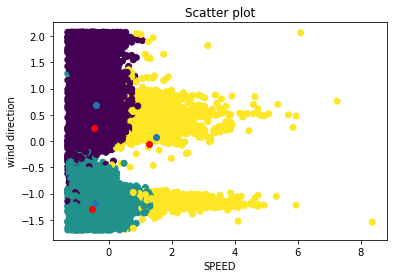

In [215]:
import matplotlib.pyplot as plt
plt.scatter(scaled_df[:,3], scaled_df[:,2], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,2])
plt.scatter(KMeans_implementation_centroids[:,3], KMeans_implementation_centroids[:,2], color='Red')
plt.xlabel("SPEED"), plt.ylabel("wind direction"), plt.title("Scatter plot")
plt.show()

Here, we can see the red dots as the centroids in my implementation, and the blue dots are from sklearn's version. SKLearn seems to perform slightly better, but my implementation is extremely close

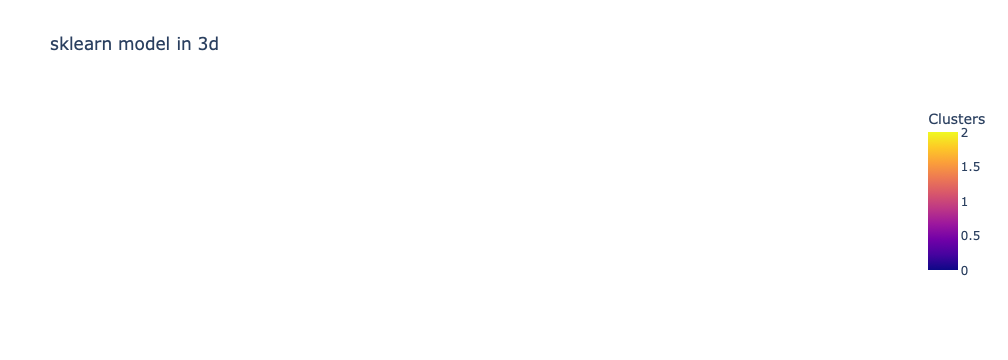

In [203]:
#Source: https://plotly.com/python/imshow/
plt = px.scatter_3d(feature_df, x = scaled_df[:,0],  z = scaled_df[:,2], y = scaled_df[:,3], color = kmeans.labels_, labels=dict(x="Air Pressure", y="speed", z="wind direction", color="Clusters"), 
title = "sklearn model in 3d")
plt.show()

In [ ]:
fig = px.scatter_3d(feature_df, x = scaled_df[:,0], z = scaled_df[:,2], y = scaled_df[:,3], color = KMeans_implementation.labels_, labels=dict(x="Air Pressure", y="speed", z="wind direction", color="Clusters"), title = "my implementation in 3d, graphed")
fig.show()

Here, we can see he Overall, both my implemenation and SKlearn's implementation provided similar results. Sklearn's seems to be performing slightly better, but I am overall happy with the performance.